In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
import seaborn as sns

In [315]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")

## Data Analysis

In [316]:
print(df.shape)
df.head(10)

(1014, 7)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [318]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [319]:
df['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

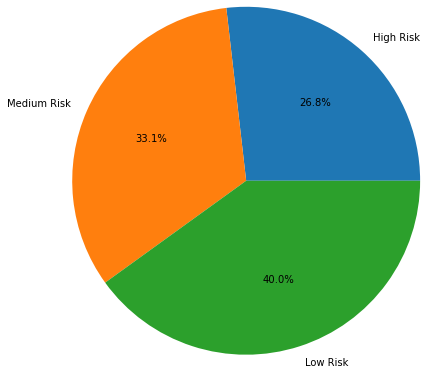

In [320]:
labels=['High Risk', 'Medium Risk', 'Low Risk']
values=[272, 336, 406]
plt.pie(values, labels=labels, autopct='%1.1f%%', radius=2)
plt.show()

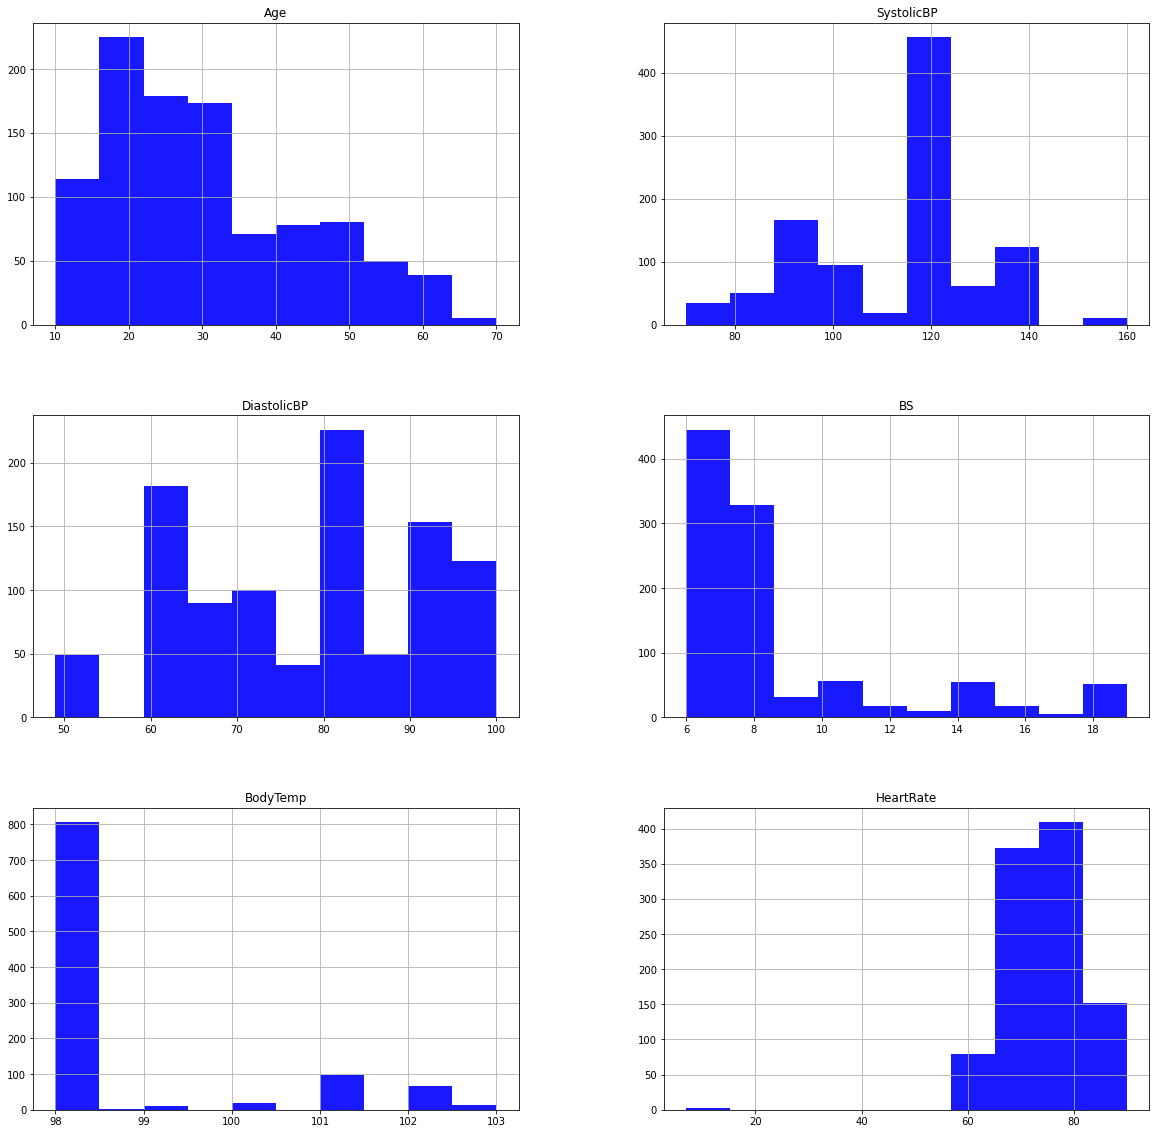

In [321]:
df.hist(figsize=(20,20), alpha=(0.9), color='blue')
plt.show()

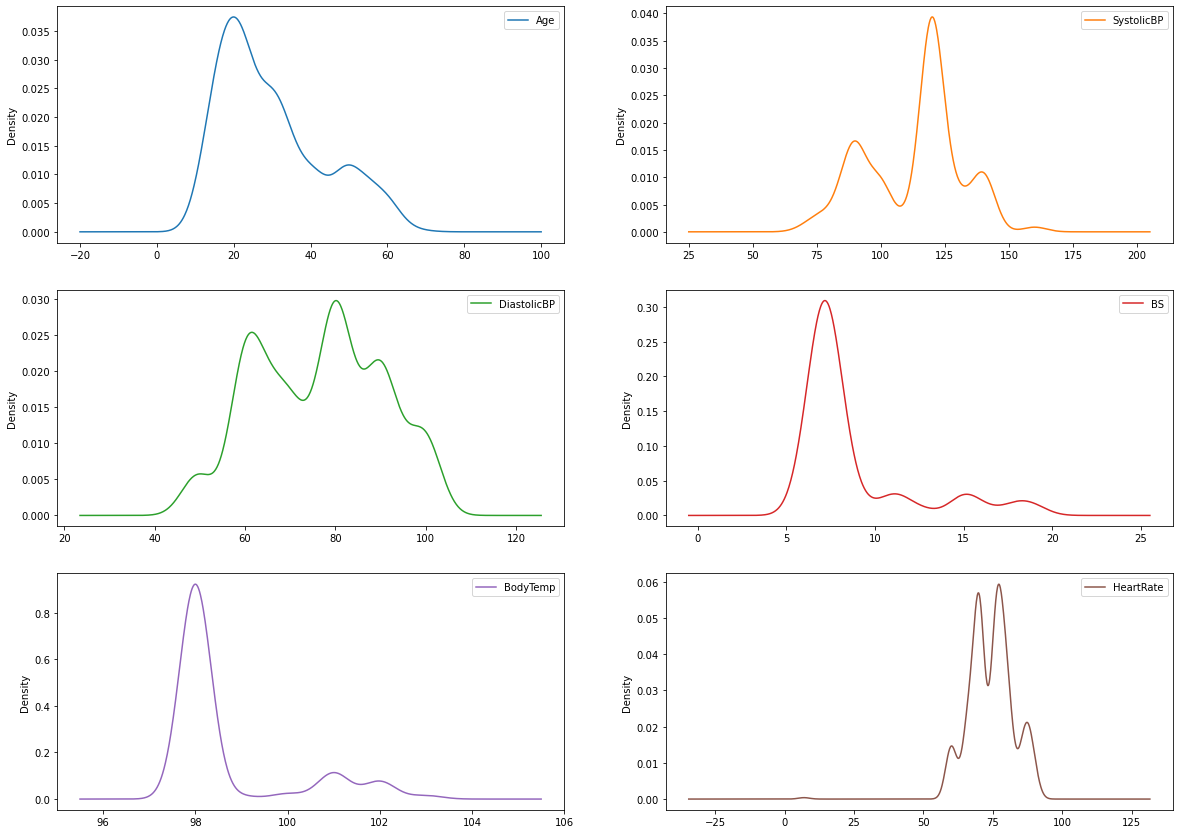

In [322]:
meanplot = df.plot(kind='density', subplots='true', layout=(4, 2), figsize=(20, 20), sharex=False)
plt.show()

<Figure size 720x360 with 0 Axes>

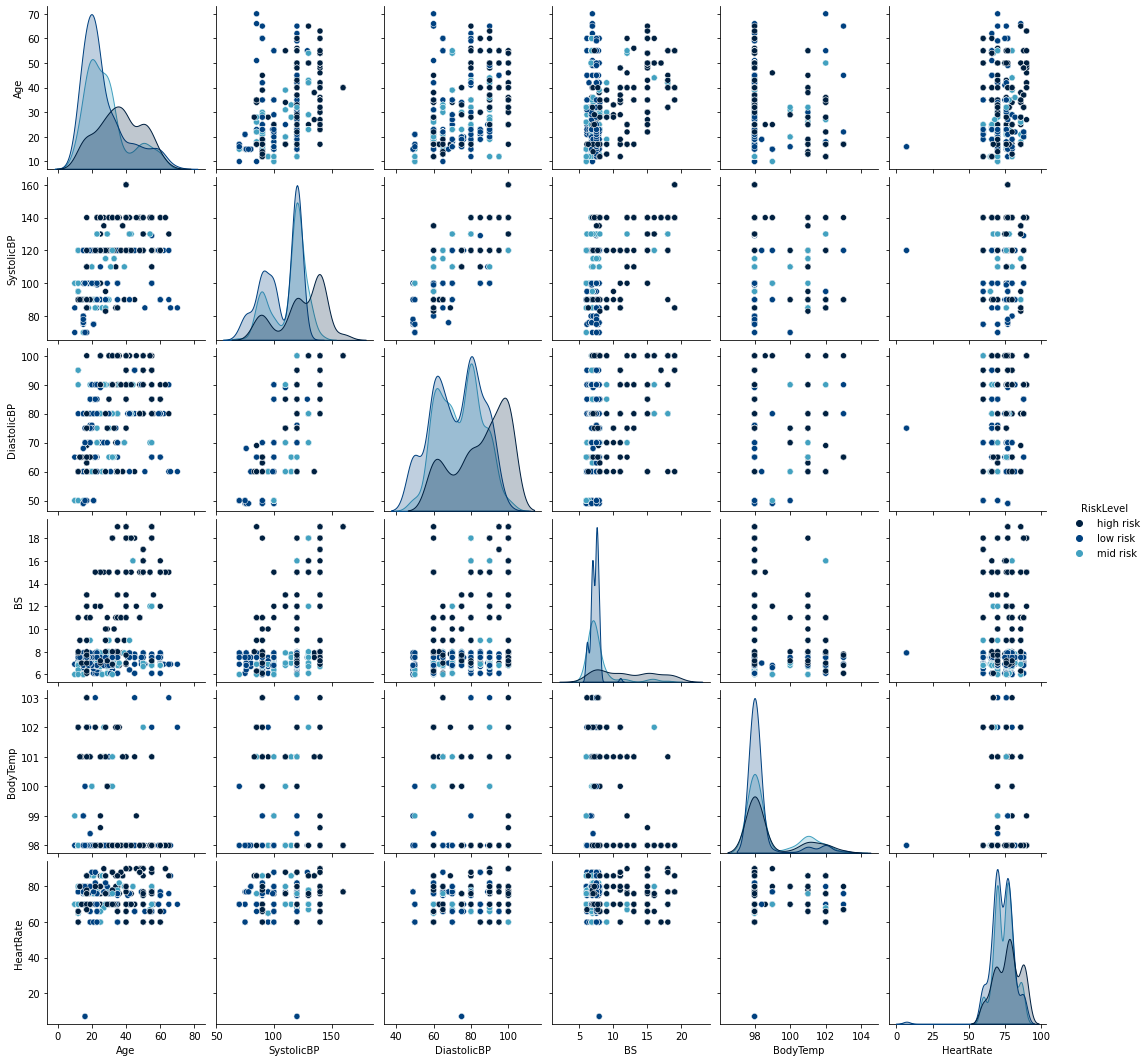

In [323]:
plt.figure(figsize=(10,5))
sns.pairplot(df, hue="RiskLevel", palette="ocean",diag_kind="kde")

In [324]:
def violin(att1,att2):
    plt.figure(figsize=(20,8))
    
    plt.subplot(1,2,1)
    sns.violinplot(data=df,y=att1,x="RiskLevel",palette='viridis')
    
    plt.subplot(1,2,2)
    sns.violinplot(data=df,y=att2,x="RiskLevel",palette='viridis')
    plt.show()

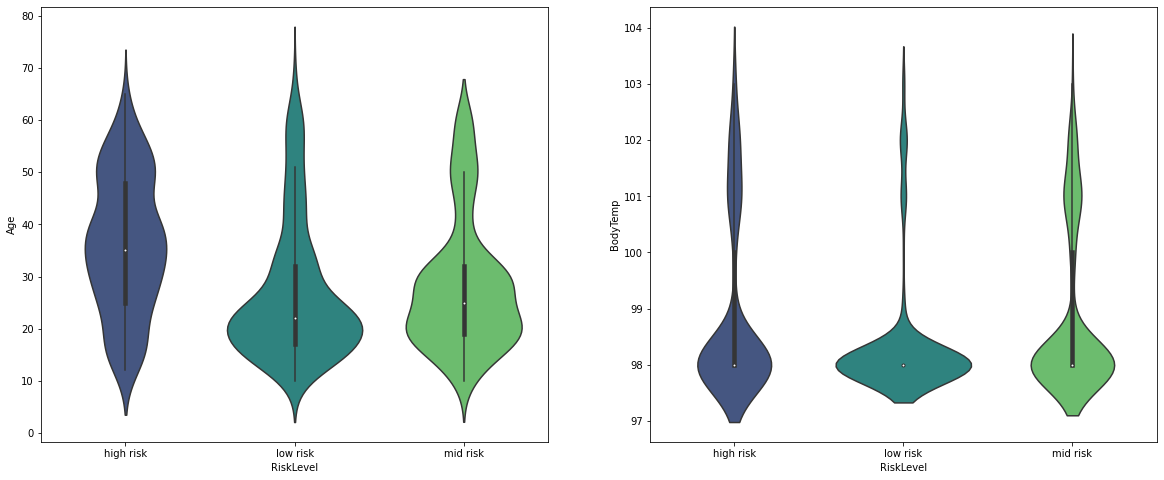

In [325]:
violin("Age", "BodyTemp")

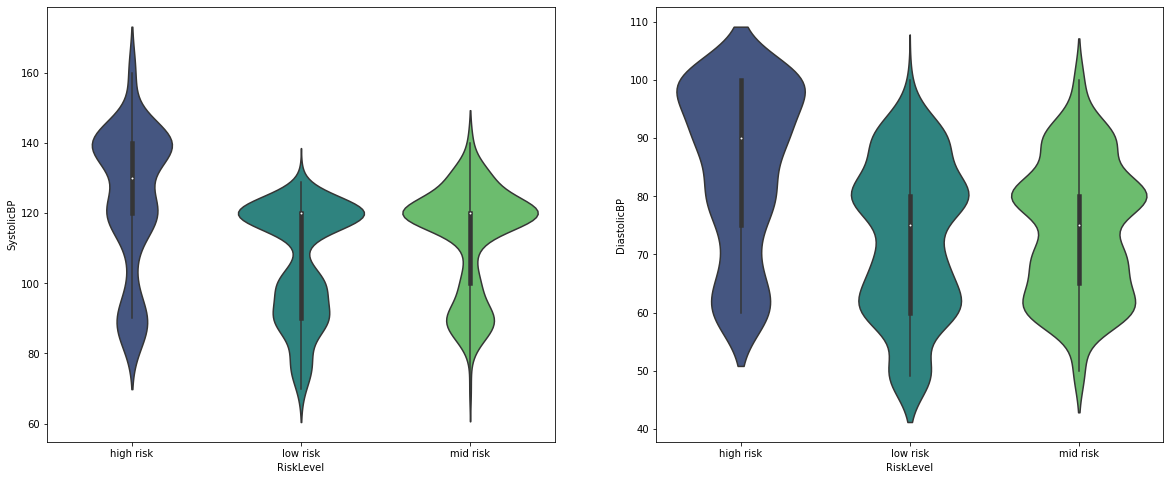

In [326]:
violin("SystolicBP", "DiastolicBP")

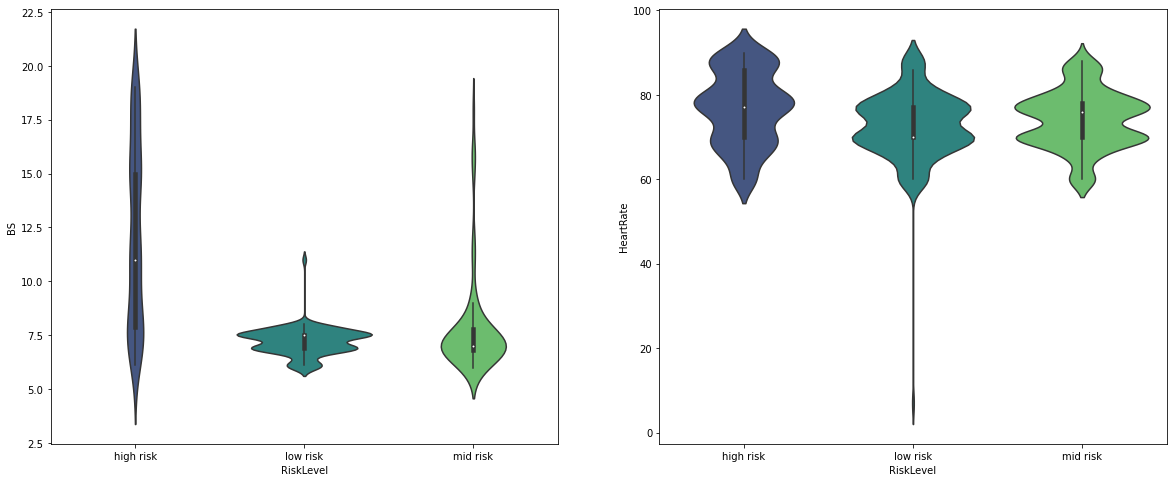

In [327]:
violin("BS", "HeartRate")

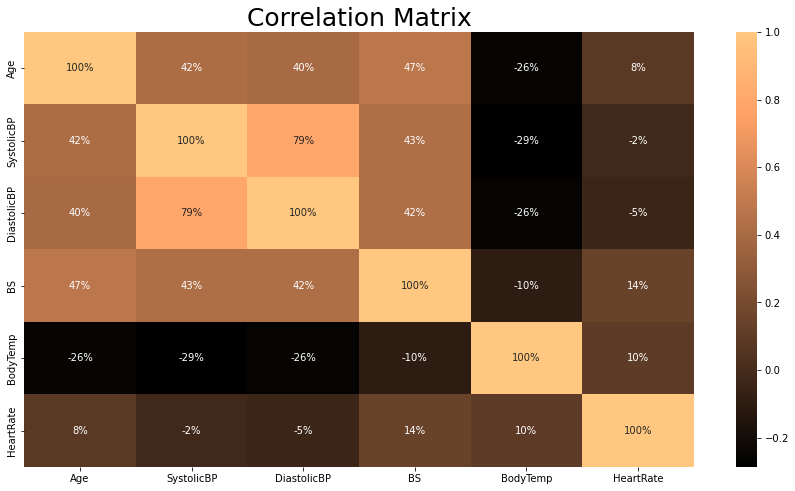

In [328]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt=".0%",cmap='copper')
plt.title('Correlation Matrix',size=25)
plt.show()

## Preprocessing

In [329]:
setEncoding = {"RiskLevel" : {"high risk": 2, "mid risk": 1, "low risk": 0}}
df = df.replace(setEncoding)
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,2
1,35,140,90,13.00,98.0,70,2
2,29,90,70,8.00,100.0,80,2
3,30,140,85,7.00,98.0,70,2
4,35,120,60,6.10,98.0,76,0
5,23,140,80,7.01,98.0,70,2
6,23,130,70,7.01,98.0,78,1
7,35,85,60,11.00,102.0,86,2
8,32,120,90,6.90,98.0,70,1
9,42,130,80,18.00,98.0,70,2


In [330]:
X = df.drop(['RiskLevel'], axis=1)
Y = df.loc[:, ['RiskLevel']]

In [331]:
for attr in X.columns:
    max_val = df[attr].max()
    min_val = df[attr].min()
    X[attr] = (X[attr] - min_val) / (max_val - min_val)

X.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,0.250000,0.666667,0.607843,0.692308,0.0,0.951807
1,0.416667,0.777778,0.803922,0.538462,0.0,0.759036
2,0.316667,0.222222,0.411765,0.153846,0.4,0.879518
3,0.333333,0.777778,0.705882,0.076923,0.0,0.759036
4,0.416667,0.555556,0.215686,0.007692,0.0,0.831325
5,0.216667,0.777778,0.607843,0.077692,0.0,0.759036
6,0.216667,0.666667,0.411765,0.077692,0.0,0.855422
7,0.416667,0.166667,0.215686,0.384615,0.8,0.951807
8,0.366667,0.555556,0.803922,0.069231,0.0,0.759036
9,0.533333,0.666667,0.607843,0.923077,0.0,0.759036


In [332]:
print(Y)

      RiskLevel
0             2
1             2
2             2
3             2
4             0
...         ...
1009          2
1010          2
1011          2
1012          2
1013          1

[1014 rows x 1 columns]


In [333]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=33)

In [334]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",Y_train.shape)
print("Shape of y_test",Y_test.shape)

Shape of X_train:  (709, 6)
Shape of X_test:  (305, 6)
Shape of y_train:  (709, 1)
Shape of y_test (305, 1)


## Classification Algorithms

### Decision Tree Classifier



In [335]:
dtModel = DecisionTreeClassifier()
dtModel.fit(X_train, Y_train)
Y_predicted = dtModel.predict(X_test)

In [336]:
score = accuracy_score(Y_test, Y_predicted)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 80.98360655737706


<AxesSubplot:>

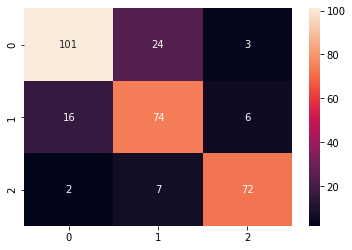

In [337]:
sns.heatmap(confusion_matrix(Y_test, Y_predicted),annot=True,fmt="d")

### Naive Bayes Classifier

In [338]:
nbModel = GaussianNB()
nbModel.fit(X_train, Y_train.values.ravel())
Y_predicted = nbModel.predict(X_test)

In [339]:
score = accuracy_score(Y_test, Y_predicted)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 63.934426229508205


<AxesSubplot:>

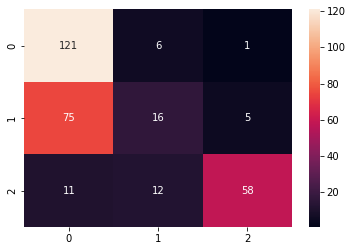

In [340]:
sns.heatmap(confusion_matrix(Y_test, Y_predicted),annot=True,fmt="d")

### Random Forest

In [341]:
rfModel = RandomForestClassifier()
rfModel.fit(X_train, Y_train.values.ravel())
Y_predicted = rfModel.predict(X_test)

In [342]:
score = accuracy_score(Y_test, Y_predicted)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 81.63934426229508


<AxesSubplot:>

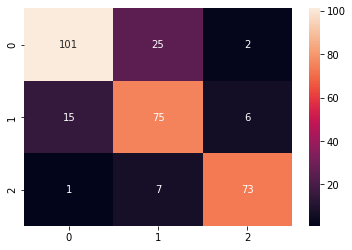

In [343]:
sns.heatmap(confusion_matrix(Y_test, Y_predicted),annot=True,fmt="d")

###  K-Nearest Neighbors

[0.9238 0.8815 0.866  0.8011 0.7884 0.7489 0.756  0.7532 0.7348 0.7334
 0.7207 0.7179 0.7179 0.7109 0.6855 0.6812 0.6784 0.6742 0.677 ]


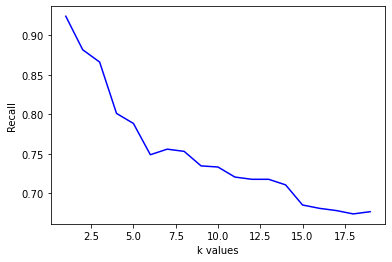

In [350]:
knn = KNeighborsClassifier()
k_range = list(range(1,20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train.values.ravel())
    k_scores.append(knn.score(X_train, Y_train))
    
print(np.round(k_scores, 4))

plt.plot(k_range, k_scores, color="Blue")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

Accuracy score:  0.6950819672131148 



<AxesSubplot:>

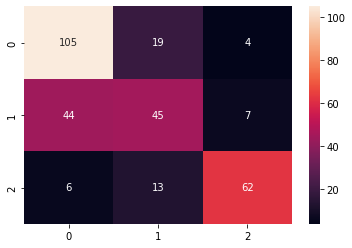

In [352]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, Y_train.values.ravel())

Y_predicted = classifier.predict(X_test)

print ("Accuracy score: ", accuracy_score(Y_test,Y_predicted), '\n')
sns.heatmap(confusion_matrix(Y_test, Y_predicted),annot=True,fmt="d")

## Comparing Scores

In [355]:
def ComparingModelScores(model_list):
    mean = []
    modelname = []
    
    for model in model_list:
        modelname.append(type(model).__name__)
        
    for i in model_list:
        scores = cross_val_score(i, X, Y.values.ravel(), cv=5)
        mean.append(scores.mean())
        
    cvs = pd.DataFrame({"Model Name":modelname,"Score":mean})
    return cvs.style.background_gradient("Greens")

In [356]:
ComparingModelScores([dtModel,nbModel,rfModel,knn])

,Model Name,Score
0,DecisionTreeClassifier,0.803819
1,GaussianNB,0.602556
2,RandomForestClassifier,0.832390
3,KNeighborsClassifier,0.673550
